###**Dataset Information**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

###Import libraries

In [ ]:
# !pip install tensorflow-gpu==2.9.2

In [ ]:
import keras
keras.__version__
from tensorflow.keras.preprocessing import sequence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Reading dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Credit_Card/creditcard.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

In [ ]:
# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(56961, 31)


In [ ]:
# statistical info
# data.describe()

In [ ]:
# check null data
# data.isnull()

### Exploratory Data Analisys

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


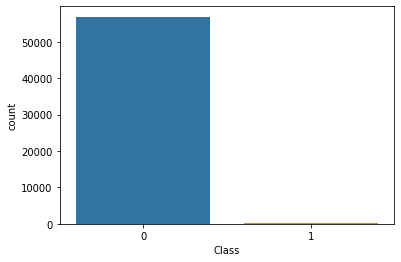

In [ ]:
sns.countplot(data['Class'])

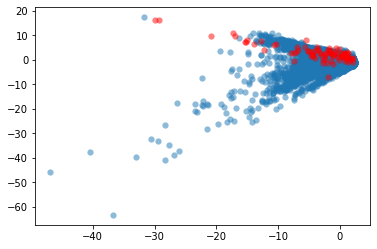

In [ ]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(data.loc[data['Class'] == 0]['V1'], data.loc[data['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(data.loc[data['Class'] == 1]['V1'], data.loc[data['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

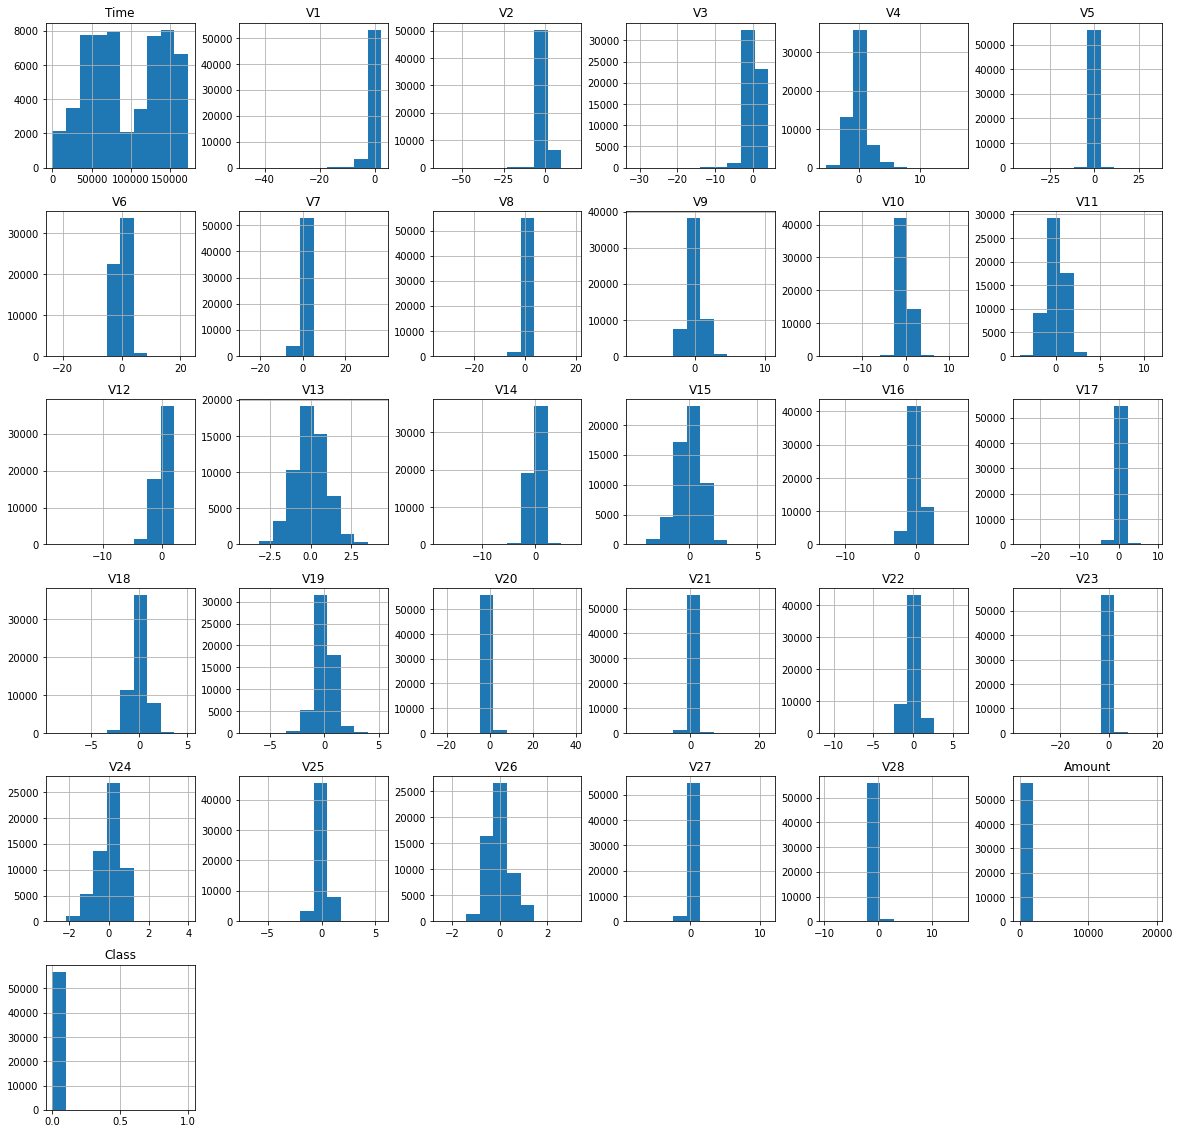

In [ ]:
# plot the histogram of each parameter
data.hist(figsize = (20, 20))
plt.show()

In [ ]:
fraud = data.loc[data['Class'] == 1]
normal = data.loc[data['Class'] == 0]

In [ ]:
print(len(fraud))
print(len(normal))

87
56874


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:, :-1]
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [ ]:
clf = linear_model.LogisticRegression(C=1e5)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [ ]:
y_pred = np.array(clf.predict(X_test))
y = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y, y_pred))

[[19902     9]
 [   10    16]]


In [ ]:
print(accuracy_score(y, y_pred))

0.9990469980438381


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19911
           1       0.64      0.62      0.63        26

    accuracy                           1.00     19937
   macro avg       0.82      0.81      0.81     19937
weighted avg       1.00      1.00      1.00     19937



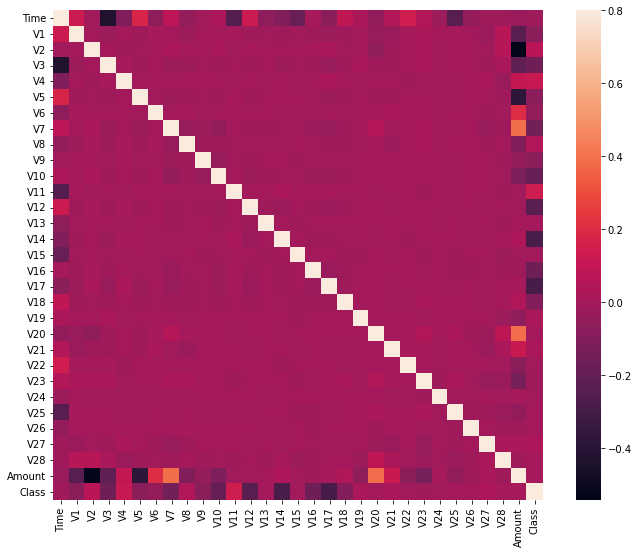

In [ ]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

###Transaction Amount Visualization

Expect a lot of low-value transactions to be uninteresting (buying cups of coffee, lunches, etc).


Only visualizes the transactions between USD 200 and 2000.




AttributeError: ignored

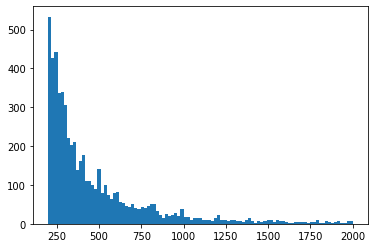

In [ ]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(normal.Amount, bins, alpha=1, normed=True, label='Non-Fraud')
plt.hist(fraud.Amount, bins, alpha=1, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

In [ ]:
# Batch size, nr tranzactii, features -> inputul retelei
# Total linii, Nr tranzactii, features -> preprocesarea setului de date

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=1):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data.iloc[indices]
            targets[j] = data.iloc[rows[j] + delay]["Class"]
        yield samples, targets

In [ ]:
lookback = 10 # pe baza a 10 tranzactii o determin pe a 11-a
step = 1
delay = 0
batch_size = 10000

train_gen = generator(data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(data,
                    lookback=lookback,
                    delay=delay,
                    min_index=189873,
                    max_index=234563,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(data,
                     lookback=lookback,
                     delay=delay,
                     min_index=234564,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# Number of steps to retrieve data from the val_gen object
# ensuring the processing of the entire validation data set.
val_steps = (300000 - 200001 - lookback) // batch_size

# Number of steps to retrieve data from the test_gen object, 
# at which the entire test data set will be processed.
test_steps = (len(data) - 300001 - lookback) // batch_size

In [ ]:
train_gen.__next__()

IndexError: ignored

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.layers import SimpleRNN

model = Sequential()
# model.add(layers.Flatten(input_shape=(lookback // step, data.shape[-1])))
model.add(SimpleRNN(32))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=["accuracy"])
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

<ipython-input-36-0d909479ae15>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


StopIteration: ignored